In [2]:
!pip install mlxtend
!pip install prophet
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer

In [3]:
happiness = pd.read_csv("Resources/WHR 2005 to 2023 Utopia 1.csv")
# happiness = pd.read_csv("Resources/WHR 2005 to 2023 No Crash.csv")
# happiness = pd.read_csv("Resources/WHR 2005 to 2023 No Pandemic.csv")
# happiness = pd.read_csv("Resources/WHR 2005 to 2023 Utopia.csv")
happiness_total = pd.read_csv("Resources/WHR 2005 to 2023 Utopia 1.csv")
happiness_ref = pd.read_csv("Resources/2019_global_happiness_reference.csv")
happiness.head()

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,Australia,North America and ANZ,1901,7.340688,10.662058,0.967892,69.800003,0.934973,NaN,0.390416,0.769770,0.238012,0.532063
1,Belgium,Western Europe,1901,7.262290,10.743808,0.934875,68.400002,0.923843,NaN,0.597554,0.676886,0.260380,0.551705
2,Brazil,Latin America and Caribbean,1901,6.636771,9.435151,0.882923,63.099998,0.882186,NaN,0.744994,0.769921,0.301780,0.340625
3,Canada,North America and ANZ,1901,7.418048,10.707299,0.961552,70.500000,0.957306,0.248033,0.502681,0.783299,0.233278,0.442818
4,Czechia,Central and Eastern Europe,1901,6.439257,10.321686,0.918759,67.099998,0.865235,NaN,0.900733,0.638764,0.257949,0.282911


In [4]:
# happiness_total.info()
happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Country Name                       1874 non-null   object 
 1   Regional Indicator                 1874 non-null   object 
 2   Year                               1874 non-null   int64  
 3   Life Ladder                        1874 non-null   float64
 4   Log GDP Per Capita                 1859 non-null   float64
 5   Social Support                     1862 non-null   float64
 6   Healthy Life Expectancy At Birth   1830 non-null   float64
 7   Freedom To Make Life Choices       1848 non-null   float64
 8   Generosity                         1807 non-null   float64
 9   Perceptions Of Corruption          1773 non-null   float64
 10  Positive Affect                    1716 non-null   float64
 11  Negative Affect                    1723 non-null   float

In [5]:
happiness.shape

(1874, 13)

In [6]:
happiness.dtypes

Country Name                          object
Regional Indicator                    object
Year                                   int64
Life Ladder                          float64
Log GDP Per Capita                   float64
Social Support                       float64
Healthy Life Expectancy At Birth     float64
Freedom To Make Life Choices         float64
Generosity                           float64
Perceptions Of Corruption            float64
Positive Affect                      float64
Negative Affect                      float64
Confidence In National Government    float64
dtype: object

In [7]:
happiness.isnull().sum()

Country Name                           0
Regional Indicator                     0
Year                                   0
Life Ladder                            0
Log GDP Per Capita                    15
Social Support                        12
Healthy Life Expectancy At Birth      44
Freedom To Make Life Choices          26
Generosity                            67
Perceptions Of Corruption            101
Positive Affect                      158
Negative Affect                      151
Confidence In National Government    440
dtype: int64

In [8]:
# sns.pairplot(happiness)

In [9]:
happiness_ref.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Variable     11 non-null     object
 1   Description  11 non-null     object
dtypes: object(2)
memory usage: 304.0+ bytes


In [10]:
happiness_ref.head(20)

,Variable,Description
0,country,Name of the country.
1,year,"Survey year, ranging from 2005-2018."
2,happiness,A happiness ranking on a scale of 0 to 10.
3,wealth,"Log GDP per capita, which indicates the wealth..."
4,support,A value that indicates how many people have fa...
5,health,Healthy life expectancy at birth.
6,freedom,Satisfaction with individual freedom to make l...
7,generosity,Measure of how likely people are to donate to ...
8,corruption,Measure of national corruption
9,positivity,"Average of measures for happiness, laugh and ..."


In [11]:
cols_to_plot = ['']

In [12]:
# print("Mean Squared Error:", mse)
# print("R^2 Score:", r2)

In [13]:
happiness_total.head(50)

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,Australia,North America and ANZ,1901,7.340688,10.662058,0.967892,69.800003,0.934973,NaN,0.390416,0.769770,0.238012,0.532063
1,Belgium,Western Europe,1901,7.262290,10.743808,0.934875,68.400002,0.923843,NaN,0.597554,0.676886,0.260380,0.551705
2,Brazil,Latin America and Caribbean,1901,6.636771,9.435151,0.882923,63.099998,0.882186,NaN,0.744994,0.769921,0.301780,0.340625
3,Canada,North America and ANZ,1901,7.418048,10.707299,0.961552,70.500000,0.957306,0.248033,0.502681,0.783299,0.233278,0.442818
4,Czechia,Central and Eastern Europe,1901,6.439257,10.321686,0.918759,67.099998,0.865235,NaN,0.900733,0.638764,0.257949,0.282911
5,Denmark,Western Europe,1901,8.018934,10.849012,0.972372,68.300003,0.971135,NaN,0.236522,0.776689,0.153672,0.668683
6,Egypt,Middle East and North Africa,1901,5.167754,8.989677,0.847842,61.400002,0.817362,NaN,NaN,0.688715,0.345555,NaN
7,France,Western Europe,1901,7.093393,10.636769,0.940338,70.699997,0.894819,NaN,0.687851,0.681278,0.225094,0.324884
8,Germany,Western Europe,1901,6.619550,10.690792,0.963490,69.900002,0.846624,NaN,0.781007,0.684765,0.197262,0.321759
9,Greece,Western Europe,1901,6.006310,10.453635,0.836539,69.599998,0.734172,NaN,0.860563,0.597687,0.263643,0.487543


In [14]:
# imputer = SimpleImputer(strategy='mean')
# imputer.fit(happiness.select_dtypes(include=np.number))

# imputer = SimpleImputer(strategy='mean')
# X_imputed = imputer.fit_transform(X)

In [15]:
# happiness_imputed = pd.DataFrame(imputer.transform(happiness.select_dtypes(include=np.number)), columns=happiness.select_dtypes(include=np.number).columns)

In [16]:
# categorical_cols = happiness.select_dtypes(exclude=np.number).columns
# happiness_imputed[categorical_cols] = happiness[categorical_cols]

In [17]:
# happiness_imputed.isnull().sum()

In [18]:
# happiness_imputed.to_csv("Resources/preprocessed_happiness_data.csv", index=False)

In [19]:
# X = happiness_imputed.drop(columns=['Life Ladder'])
# y = happiness_imputed['Life Ladder']

In [20]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# print("X_train data types:")
# print(X_train.dtypes)
# print("\n")
# print("y_train data types:")
# print(y_train.dtypes)

In [22]:
# # Perform one-hot encoding on categorical variables
# happiness_encoded = pd.get_dummies(happiness_imputed, columns=['Country Name', 'Regional Indicator'])

In [23]:
# from sklearn.linear_model import LinearRegression

# # Define the model
# model = LinearRegression()

In [24]:
# # Encode categorical variables using one-hot encoding
# X_encoded = pd.get_dummies(X)

In [25]:
# # Split the encoded data into training and testing sets
# X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [26]:
# # Train the model
# model.fit(X_train_encoded, y_train)

In [27]:
# # Evaluate the model
# y_pred = model.predict(X_test_encoded)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print("Mean Squared Error:", mse)
# print("R^2 Score:", r2)

In [28]:
# # Train the model
# model.fit(X_train_encoded, y_train)

In [29]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.linear_model import LinearRegression

# # Define the grid of hyperparameters
# param_grid = {
#     'fit_intercept': [True, False]
# }

# # Initialize LinearRegression model
# model = LinearRegression()

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# # Fit the GridSearchCV object to the data
# grid_search.fit(X_train_encoded, y_train)

# # Get the best model
# best_model = grid_search.best_estimator_

# # Print the best hyperparameters
# print("Best Hyperparameters:", grid_search.best_params_)

# # Evaluate the best model
# y_pred_best = best_model.predict(X_test_encoded)
# mse_best = mean_squared_error(y_test, y_pred_best)
# r2_best = r2_score(y_test, y_pred_best)

# print("Mean Squared Error (Best Model):", mse_best)
# print("R^2 Score (Best Model):", r2_best)

In [30]:
from prophet import Prophet

# Create a Prophet model
prophet_model = Prophet()

In [31]:
model = Prophet()

In [32]:
print(happiness.head())
print(happiness.dtypes)

  Country Name           Regional Indicator  Year  Life Ladder  \
0    Australia        North America and ANZ  1901     7.340688   
1      Belgium               Western Europe  1901     7.262290   
2       Brazil  Latin America and Caribbean  1901     6.636771   
3       Canada        North America and ANZ  1901     7.418048   
4      Czechia   Central and Eastern Europe  1901     6.439257   

   Log GDP Per Capita  Social Support  Healthy Life Expectancy At Birth  \
0           10.662058        0.967892                         69.800003   
1           10.743808        0.934875                         68.400002   
2            9.435151        0.882923                         63.099998   
3           10.707299        0.961552                         70.500000   
4           10.321686        0.918759                         67.099998   

   Freedom To Make Life Choices  Generosity  Perceptions Of Corruption  \
0                      0.934973         NaN                   0.390416   
1   

In [33]:
# Convert 'Year' column to datetime format and rename it to 'ds'
happiness['ds'] = pd.to_datetime(happiness['Year'], format='%Y')

# Select a column containing the target variable and rename it to 'y'
happiness.rename(columns={'Life Ladder': 'y'}, inplace=True)

# Check the first few rows and data types again to verify the changes
print(happiness.head())
print(happiness.dtypes)

  Country Name           Regional Indicator  Year         y  \
0    Australia        North America and ANZ  1901  7.340688   
1      Belgium               Western Europe  1901  7.262290   
2       Brazil  Latin America and Caribbean  1901  6.636771   
3       Canada        North America and ANZ  1901  7.418048   
4      Czechia   Central and Eastern Europe  1901  6.439257   

   Log GDP Per Capita  Social Support  Healthy Life Expectancy At Birth  \
0           10.662058        0.967892                         69.800003   
1           10.743808        0.934875                         68.400002   
2            9.435151        0.882923                         63.099998   
3           10.707299        0.961552                         70.500000   
4           10.321686        0.918759                         67.099998   

   Freedom To Make Life Choices  Generosity  Perceptions Of Corruption  \
0                      0.934973         NaN                   0.390416   
1                     

In [34]:
# # Rename the datetime column to 'ds'
# df_test.rename(columns={'Year': 'ds'}, inplace=True)

# # Evaluate the model on the test data
# y_pred_test = model.predict(X_test_encoded)
# mse_test = mean_squared_error(y_test, y_pred_test)
# r2_test = r2_score(y_test, y_pred_test)
# print("Test Mean Squared Error:", mse_test)
# print("Test R^2 Score:", r2_test)

In [35]:
# # Rename the datetime column to 'ds'
# df_test.rename(columns={'date': 'ds'}, inplace=True)

# # Evaluate the model on the training data
# y_pred_train = model.predict(X_train_encoded)
# mse_train = mean_squared_error(y_train, y_pred_train)
# r2_train = r2_score(y_train, y_pred_train)
# print("Training Mean Squared Error:", mse_train)
# print("Training R^2 Score:", r2_train)

# # Evaluate the model on the training data
# y_pred_train = model.predict(X_train_encoded)
# mse_train = mean_squared_error(y_train, y_pred_train)
# r2_train = r2_score(y_train, y_pred_train)
# print("Training Mean Squared Error:", mse_train)
# print("Training R^2 Score:", r2_train)

In [36]:
# Fit the Prophet model to the data
model.fit(happiness)

23:27:50 - cmdstanpy - INFO - Chain [1] start processing
23:27:50 - cmdstanpy - INFO - Chain [1] done processing


In [37]:
# Create a DataFrame for the next X years
future_dates = model.make_future_dataframe(periods=200, freq='Y')

In [38]:
# Make predictions for the future dates
forecast = model.predict(future_dates)

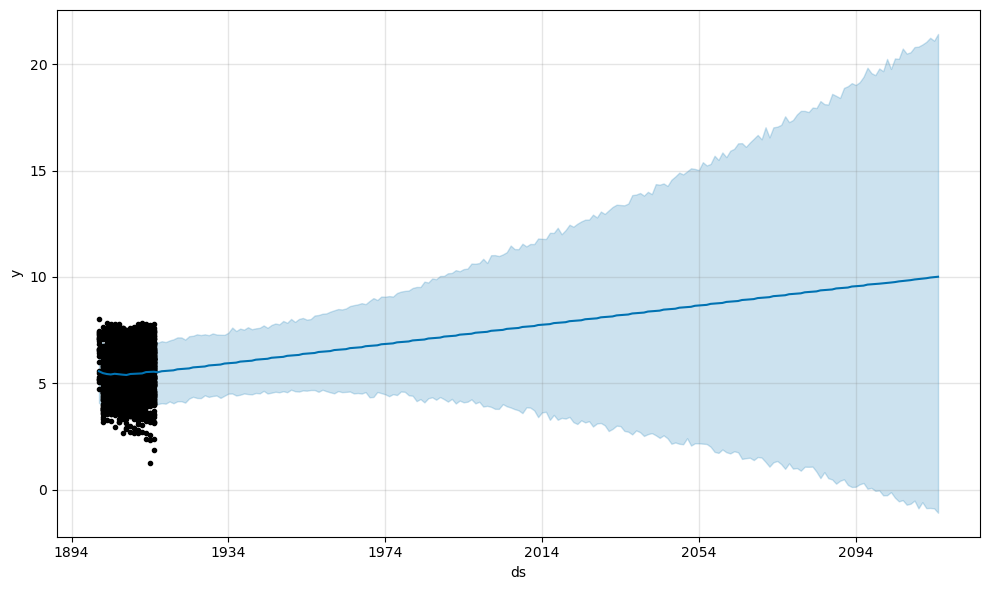

In [39]:
# Plot the forecast
fig = model.plot(forecast)

In [40]:
# import matplotlib.pyplot as plt
# from mlxtend.plotting import plot_decision_regions
# from sklearn.datasets import make_classification
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.neighbors import KNeighborsClassifier

# # Generate synthetic dataset
# X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
#                            random_state=1, n_clusters_per_class=1)

# # Define classifiers
# rf_clf = RandomForestClassifier(n_estimators=100, random_state=1)
# knn_clf = KNeighborsClassifier(n_neighbors=3)

# # Fit classifiers
# rf_clf.fit(X, y)
# knn_clf.fit(X, y)

# # Plot decision boundaries
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# plot_decision_regions(X, y, clf=rf_clf, legend=2)
# plt.title('Decision Boundaries - Random Forest')

# plt.subplot(1, 2, 2)
# plot_decision_regions(X, y, clf=knn_clf, legend=2)
# plt.title('Decision Boundaries - k-Nearest Neighbors')

# plt.show()

In [41]:
# from sklearn.svm import SVC
# from sklearn.linear_model import LogisticRegression

# # Define classifiers
# svm_clf = SVC(kernel='linear', C=1.0, random_state=1)
# lr_clf = LogisticRegression(random_state=1)

# # Fit classifiers
# svm_clf.fit(X, y)
# lr_clf.fit(X, y)

# # Plot decision boundaries
# plt.figure(figsize=(12, 6))

# plt.subplot(1, 2, 1)
# plot_decision_regions(X, y, clf=svm_clf, legend=2)
# plt.title('Decision Boundaries - Support Vector Machine')

# plt.subplot(1, 2, 2)
# plot_decision_regions(X, y, clf=lr_clf, legend=2)
# plt.title('Decision Boundaries - Logistic Regression')

# plt.show()

In [42]:
# # Evaluate the model on the training data
# y_pred_train = model.predict(X_train_encoded)
# mse_train = mean_squared_error(y_train, y_pred_train)
# r2_train = r2_score(y_train, y_pred_train)
# print("Training Mean Squared Error:", mse_train)
# print("Training R^2 Score:", r2_train)

In [43]:
# print("Mean Squared Error (Best Model):", mse_best)
# print("R^2 Score (Best Model):", r2_best)

In [44]:
# # Evaluate the model
# y_pred = model.predict(X_test_encoded)
# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print("Mean Squared Error:", mse)
# print("R^2 Score:", r2)